In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
df = pd.read_csv(r'./student-por.csv', sep=';')

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
print(df.loc[1])

school             GP
sex                 F
age                17
address             U
famsize           GT3
Pstatus             T
Medu                1
Fedu                1
Mjob          at_home
Fjob            other
reason         course
guardian       father
traveltime          1
studytime           2
failures            0
schoolsup          no
famsup            yes
paid               no
activities         no
nursery            no
higher            yes
internet          yes
romantic           no
famrel              5
freetime            3
goout               3
Dalc                1
Walc                1
health              3
absences            2
G1                  9
G2                 11
G3                 11
Name: 1, dtype: object


In [15]:
print(df.isnull().sum(), "\n")

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64 



In [19]:

#  Detect duplicates
duplicates = df.duplicated().sum()
print(f"🔹 Duplicate rows: {duplicates}\n")


🔹 Duplicate rows: 0



In [ ]:

# Summary statistics
print("Summary Statistics:")
df.describe(include='all').T, "\n"


🔹 Summary Statistics:


(            count unique     top freq       mean       std   min   25%   50%  \
 school        649      2      GP  423        NaN       NaN   NaN   NaN   NaN   
 sex           649      2       F  383        NaN       NaN   NaN   NaN   NaN   
 age         649.0    NaN     NaN  NaN  16.744222  1.218138  15.0  16.0  17.0   
 address       649      2       U  452        NaN       NaN   NaN   NaN   NaN   
 famsize       649      2     GT3  457        NaN       NaN   NaN   NaN   NaN   
 Pstatus       649      2       T  569        NaN       NaN   NaN   NaN   NaN   
 Medu        649.0    NaN     NaN  NaN   2.514638  1.134552   0.0   2.0   2.0   
 Fedu        649.0    NaN     NaN  NaN   2.306626  1.099931   0.0   1.0   2.0   
 Mjob          649      5   other  258        NaN       NaN   NaN   NaN   NaN   
 Fjob          649      5   other  367        NaN       NaN   NaN   NaN   NaN   
 reason        649      4  course  285        NaN       NaN   NaN   NaN   NaN   
 guardian      649      3  m

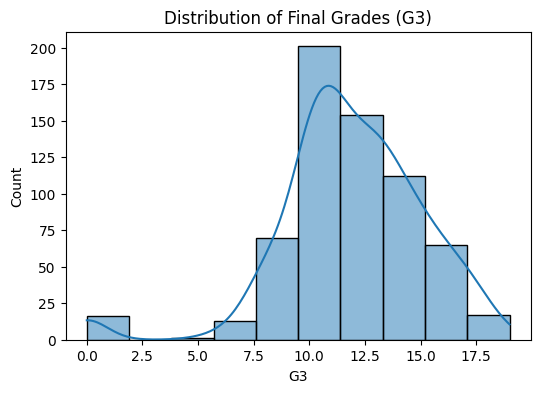

In [20]:

# Convert categorical yes/no to 1/0
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 
               'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Basic visualizations

# a) Distribution of final grades
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()


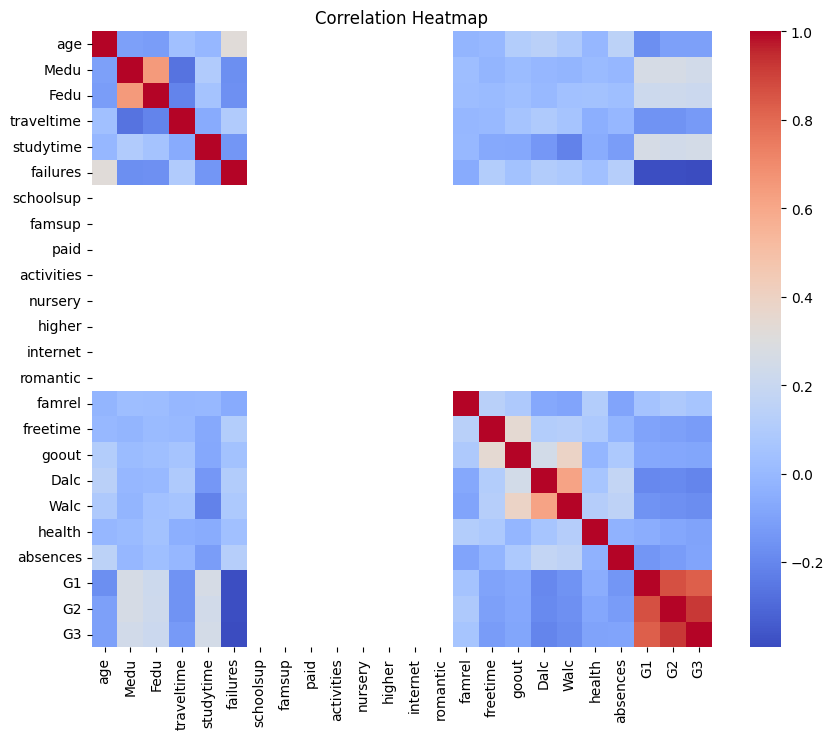

In [21]:

# b) Correlation heatmap (numerical only)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


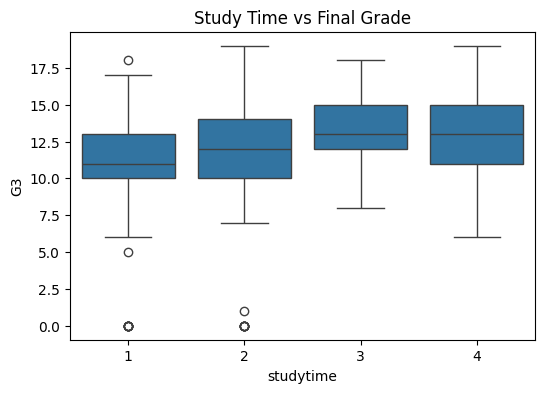

🔹 Correlation with Final Grade (G3):
G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
schoolsup          NaN
famsup             NaN
paid               NaN
activities         NaN
nursery            NaN
higher             NaN
internet           NaN
romantic           NaN
Name: G3, dtype: float64


In [22]:

# c) Relationship between studytime and final grade
plt.figure(figsize=(6,4))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()

# Check feature importance correlations with G3
corr_with_g3 = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print("🔹 Correlation with Final Grade (G3):")
print(corr_with_g3)


In [23]:

print("Number of students:", len(df))
print("Number of features:", len(df.columns))


Number of students: 649
Number of features: 33


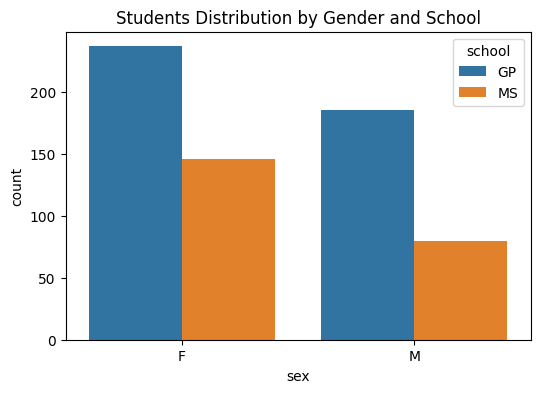

Average of G1, G2, G3:
G1    11.399076
G2    11.570108
G3    11.906009
dtype: float64


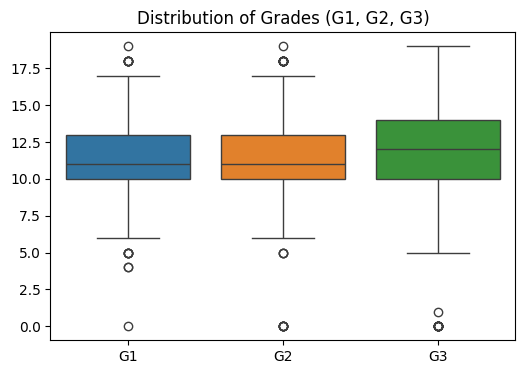

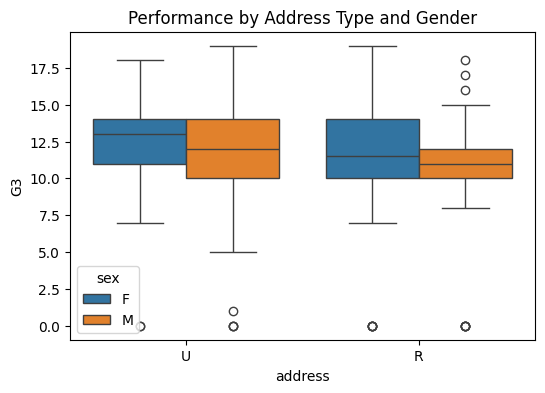

In [25]:

# -------------------------------
# 2. Distribution by gender and school
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='school', data=df)
plt.title("Students Distribution by Gender and School")
plt.show()

# -------------------------------
# 3. Average grades (G1, G2, G3)
# -------------------------------
print("Average of G1, G2, G3:")
print(df[['G1','G2','G3']].mean())

plt.figure(figsize=(6,4))
sns.boxplot(data=df[['G1','G2','G3']])
plt.title("Distribution of Grades (G1, G2, G3)")
plt.show()


# -------------------------------
# 5. Compare performance by address (Urban/Rural) and gender
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='address', y='G3', hue='sex', data=df)
plt.title("Performance by Address Type and Gender")
plt.show()

In [27]:
# =========================
# 🎯 1. Classification - Predict Performance Level
# =========================

# Binary columns to numeric
binary_cols = ['schoolsup', 'famsup', 'internet']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Create performance level target
def performance(g3):
    if g3 >= 15:
        return 'Excellent'
    elif g3 >= 10:
        return 'Good'
    else:
        return 'Poor'

df['Performance'] = df['G3'].apply(performance)

# Select features
X = df[['studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'internet', 'health', 'G1', 'G2']]
y = df['Performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


🎯 Classification Report:
              precision    recall  f1-score   support

   Excellent       0.91      0.97      0.94        32
        Good       0.92      0.87      0.89        83
        Poor       0.56      0.67      0.61        15

    accuracy                           0.87       130
   macro avg       0.80      0.83      0.81       130
weighted avg       0.88      0.87      0.87       130

Accuracy: 0.8692307692307693


In [28]:
# =========================
# 📈 2. Regression - Predict Final Grade (G3)
# =========================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features
X = df[['G1', 'G2', 'studytime', 'absences', 'failures', 'Dalc', 'Walc', 'health']]
y = df['G3']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluation
print("\n📊 Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



📊 Regression Results:
R² Score: 0.8438961677489252
RMSE: 1.2338072114108252



🧩 Cluster Centers (Scaled):
[[ 0.29990547 -0.29140542 -0.35839028 -0.63114214 -0.4261453   0.41779376]
 [-0.23673515  0.22733997 -0.29730638  0.85977985  0.51973039 -0.08399644]
 [-0.42574188  0.42086658  2.06243275 -0.0722638   0.1139909  -1.25128081]]


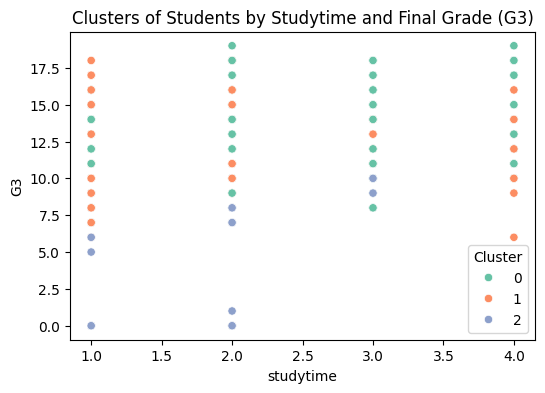


🔹 Cluster Summary:
         studytime  absences  failures     goout  freetime         G3
Cluster                                                              
0         2.179245  2.308176  0.009434  2.443396  2.732704  13.254717
1         1.734440  4.713693  0.045643  4.195021  3.726141  11.634855
2         1.577778  5.611111  1.444444  3.100000  3.300000   7.866667


In [29]:
# =========================
# 🧩 3. Clustering - Group Students by Study Habits & Behavior
# =========================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select features
X = df[['studytime', 'absences', 'failures', 'goout', 'freetime', 'G3']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
print("\n🧩 Cluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# Visualize clusters by G3 and studytime
plt.figure(figsize=(6,4))
sns.scatterplot(x='studytime', y='G3', hue='Cluster', data=df, palette='Set2')
plt.title("Clusters of Students by Studytime and Final Grade (G3)")
plt.show()

# View average values per cluster
print("\n🔹 Cluster Summary:")
print(df.groupby('Cluster')[['studytime','absences','failures','goout','freetime','G3']].mean())


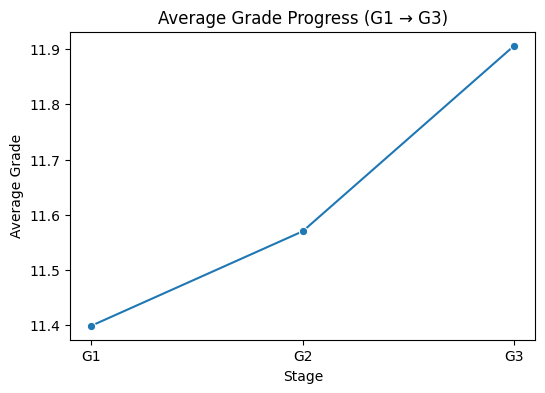

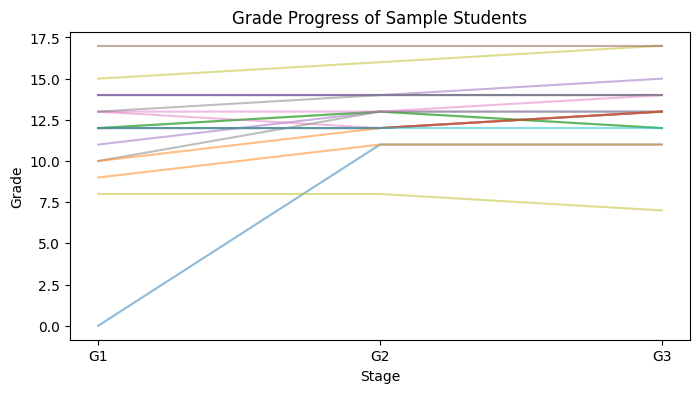

📈 Time Series Regression (G3 ~ G1 + G2):
R² Score: 0.8477615336889918
RMSE: 1.2595578069101419


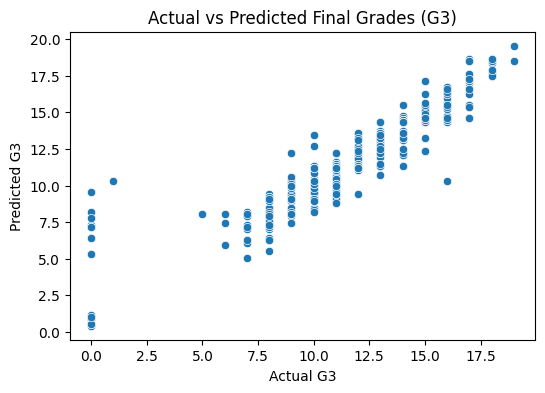

Intercept: -0.17128308798693404
Coefficients for [G1, G2]: [0.14889649 0.89714029]


In [31]:
# =========================
# ⏳ Time Series Analysis - Student Performance Progress
# =========================


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# -------------------------------
# 1️⃣ Analyze performance progress (G1 → G2 → G3)
# -------------------------------

# Calculate average grade for each stage
mean_grades = df[['G1', 'G2', 'G3']].mean()

# Plot average progress
plt.figure(figsize=(6,4))
sns.lineplot(x=['G1','G2','G3'], y=mean_grades.values, marker='o')
plt.title("Average Grade Progress (G1 → G3)")
plt.ylabel("Average Grade")
plt.xlabel("Stage")
plt.show()

# Plot change per student (optional visualization)
plt.figure(figsize=(8,4))
for i in range(20):  # show first 20 students for clarity
    plt.plot(['G1','G2','G3'], df.loc[i, ['G1','G2','G3']], alpha=0.5)
plt.title("Grade Progress of Sample Students")
plt.ylabel("Grade")
plt.xlabel("Stage")
plt.show()

# -------------------------------
# 2️⃣ Predict final grade (G3) using G1 and G2
# -------------------------------

X = df[['G1', 'G2']]
y = df['G3']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
print("📈 Time Series Regression (G3 ~ G1 + G2):")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

# Compare actual vs predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred)
plt.title("Actual vs Predicted Final Grades (G3)")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

# Show model coefficients
print("Intercept:", model.intercept_)
print("Coefficients for [G1, G2]:", model.coef_)


Number of students: 649
Columns: 35
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout Dalc  Walc  health  absences  G1  G2  G3  Performance  Cluster  
0     4    1     1       3         4   0  11  11         Good        1  
1     3    1     1       3         2   9  11  11         Good        0  
2     2    2     3       3         6  12  13  12         Good        0  
3     2    1     1       5         0  14  14  14         Good        0  
4     2    1     2       5         0  11  13  13         Good        0  

[5 rows x 35 columns]
Average grades:


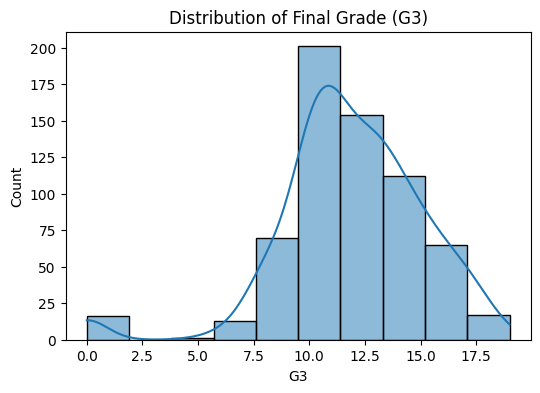

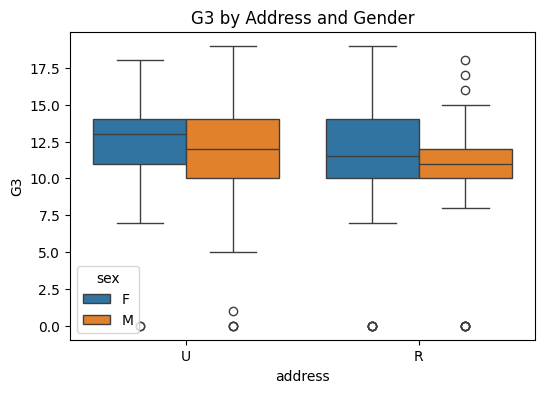

Classification Accuracy: 0.8692307692307693
              precision    recall  f1-score   support

   Excellent       0.91      0.97      0.94        32
        Good       0.92      0.87      0.89        83
        Poor       0.56      0.67      0.61        15

    accuracy                           0.87       130
   macro avg       0.80      0.83      0.81       130
weighted avg       0.88      0.87      0.87       130

Regression R²: 0.8438961677489252
Regression RMSE: 1.2338072114108252
Cluster Summary:
          studytime  absences  failures     goout  freetime         G3
Cluster                                                              
0         2.179245  2.308176  0.009434  2.443396  2.732704  13.254717
1         1.734440  4.713693  0.045643  4.195021  3.726141  11.634855
2         1.577778  5.611111  1.444444  3.100000  3.300000   7.866667


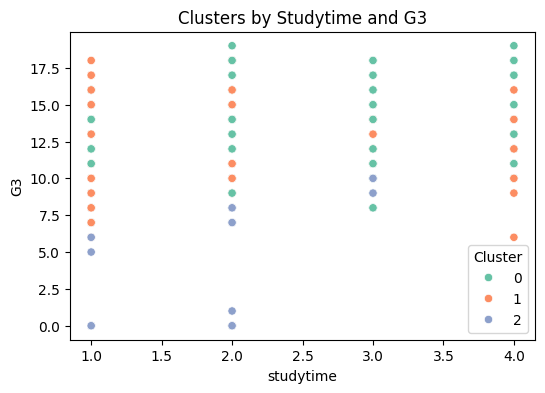

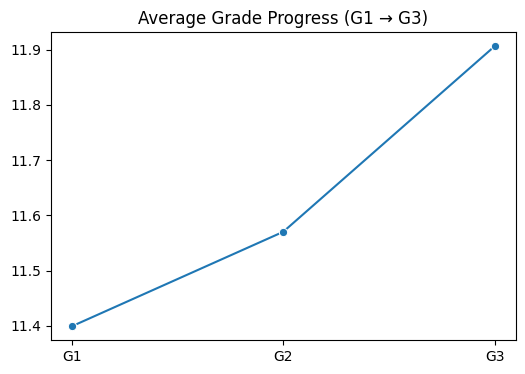

Time Series R²: 0.8477615336889918
Time Series RMSE: 1.2595578069101419


In [ ]:

# ---------------------------
# Load Data and Clean
# ---------------------------
# df = pd.read_csv('student-mat.csv', sep=';')

# Convert yes/no to numeric
binary_cols = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for col in binary_cols:
    df[col] = df[col].map({'yes':1,'no':0})

# ---------------------------
# EDA
# ---------------------------
print("Number of students:", len(df))
print("Columns:", len(df.columns))
print(df.head())

# Average grades
print("Average grades:\n", df[['G1','G2','G3']].mean())

# Plot distribution of final grade
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.show()

# Address and gender
plt.figure(figsize=(6,4))
sns.boxplot(x='address', y='G3', hue='sex', data=df)
plt.title("G3 by Address and Gender")
plt.show()

# ---------------------------
# Classification (Performance Level)
# ---------------------------
def performance(g3):
    if g3 >= 15: return 'Excellent'
    elif g3 >= 10: return 'Good'
    else: return 'Poor'
df['Performance'] = df['G3'].apply(performance)

X_clf = df[['studytime','failures','absences','schoolsup','famsup','internet','health','G1','G2']]
y_clf = df['Performance']
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------------------------
# Regression (Predict G3)
# ---------------------------
X_reg = df[['G1','G2','studytime','absences','failures','Dalc','Walc','health']]
y_reg = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Regression R²:", r2_score(y_test, y_pred))
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ---------------------------
# Clustering
# ---------------------------
X_clust = df[['studytime','absences','failures','goout','freetime','G3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster Summary:\n", df.groupby('Cluster')[['studytime','absences','failures','goout','freetime','G3']].mean())
plt.figure(figsize=(6,4))
sns.scatterplot(x='studytime', y='G3', hue='Cluster', data=df, palette='Set2')
plt.title("Clusters by Studytime and G3")
plt.show()

# ---------------------------
# Time Series Analysis (G1 → G2 → G3)
# ---------------------------
mean_grades = df[['G1','G2','G3']].mean()
plt.figure(figsize=(6,4))
sns.lineplot(x=['G1','G2','G3'], y=mean_grades.values, marker='o')
plt.title("Average Grade Progress (G1 → G3)")
plt.show()

# Predict G3 from G1 and G2
X_ts = df[['G1','G2']]
y_ts = df['G3']
model = LinearRegression()
model.fit(X_ts, y_ts)
y_pred = model.predict(X_ts)
print("Time Series R²:", r2_score(y_ts, y_pred))
print("Time Series RMSE:", np.sqrt(mean_squared_error(y_ts, y_pred)))
